In [2]:
from importlib.metadata import version
import nltk
import tensorflow
import summa
import pandas

print(nltk.__version__)
print(tensorflow.__version__)
print(pandas.__version__)
print(version('summa'))

3.8.1
2.10.0
2.1.1
1.2.0


In [3]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Desk_Kang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv("C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/news_summary_more.csv")
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98401


In [4]:
data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [5]:
# text가 본문, headlines가 요약
# text가 본문, 추출적 요약에서는 text만 사용

In [8]:
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [10]:
# 중복이... 있어...?
# csv 파일 열어서 확인해본 결과 headlines, text 중복 확인
# headlines이 중복되는데 text 중복 안하는거 확인
# headlines가 중복되는데 text가 중복이 과연 아닐까...?
# 같은 headlines 같은 text인데 왜 중복이 아니라고 했을까
# 같은 headlines를 가지고 있으면 같다고 판단, 중복제거 실시

In [12]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
# 텍스트 중복 제거
data.drop_duplicates(subset = ['text'], inplace=True)

In [13]:
# headlines 중복 제거
data.drop_duplicates(subset = ['headlines'], inplace=True)

In [14]:
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98262


In [16]:
# null값 확인
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [17]:
# 정규화 사전
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [18]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [20]:
clean_text = []

for text in data['text']:
    clean_text.append(preprocess_sentence(text))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

In [23]:
clean_headlines = []

for text in data['headlines']:
    clean_headlines.append(preprocess_sentence(text))

print("Headlines 전처리 후 결과: ", clean_headlines[:5])

C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_1364\966821911.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거


Headlines 전처리 후 결과:  ['upgrad learner switches career ml al salary hike', 'delhi techie wins free food swiggy one year cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'known hirani yrs metoo claims true sonam']


In [24]:
data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

In [25]:
data.head()

,headlines,text
0,upgrad learner switches career ml al salary hike,saurav kant alumnus upgrad iiit pg program mac...
1,delhi techie wins free food swiggy one year cred,kunal shah credit card bill payment platform c...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...
4,known hirani yrs metoo claims true sonam,speaking sexual harassment allegations rajkuma...


In [26]:
# 데이터 Null값 확인
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [27]:
# 나중에 힘들어지니까 일단 저장
data.to_csv('prep_news_headlines.csv', index=False)

In [4]:
# 전처리한 데이터 불러오기
data = pd.read_csv('prep_news_headlines.csv')

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.10029309397326
요약의 최소 길이 : 1
요약의 최대 길이 : 13
요약의 평균 길이 : 7.136787364393153


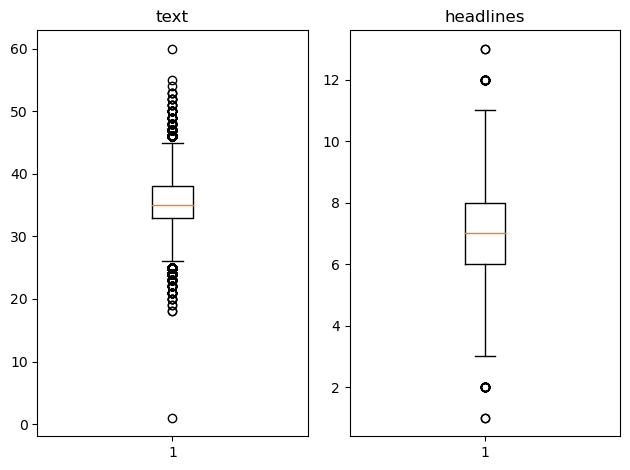

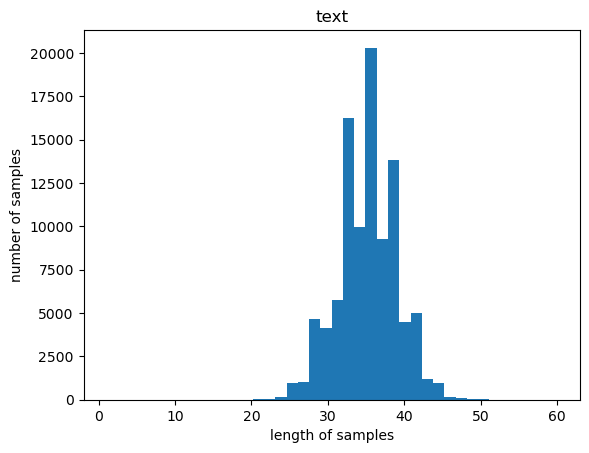

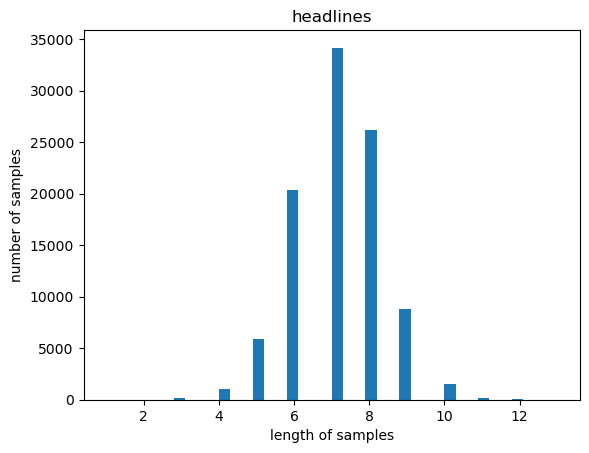

In [5]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [6]:
# 임의 설정
text_max_len = 42
headlines_max_len = 8

In [7]:
# 수치확인용
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [8]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 42 이하인 샘플의 비율: 0.9750157741548106
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.8925016791842217


In [171]:
# text_max_len = 45 , headlines_max_len = 9 일때 각각 약 0.996 / 0.98  
# text_max_len = 44 , headlines_max_len = 9 일때 각각 약 0.993 / 0.98
# text_max_len = 43 , headlines_max_len = 9 일때 각각 약 0.987 / 0.98
# text_max_len = 42 , headlines_max_len = 9 일때 각각 약 0.975 / 0.98
# text_max_len = 41 , headlines_max_len = 9 일때 각각 약 0.954 / 0.98
# text_max_len = 40 , headlines_max_len = 8 일때 각각 약 0.923 / 0.89
# 추후 수치 조절을 위해 저장

In [9]:
# or 또는 and 수치가 이미 90퍼센트 이상이라 and로 설정

data = data[data.apply(lambda row : len(row['text'].split()) <= text_max_len and len(row['headlines'].split()) <= headlines_max_len, axis=1)]

In [10]:
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98261


In [174]:
# 98262에서 98261로 1개 사라짐...
# 의미가 있는가? 생각해보기

In [11]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches career ml al salary hike,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches career ml al ...,upgrad learner switches career ml al salary hi...
1,delhi techie wins free food swiggy one year cred,kunal shah credit card bill payment platform c...,sostoken delhi techie wins free food swiggy on...,delhi techie wins free food swiggy one year cr...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
4,known hirani yrs metoo claims true sonam,speaking sexual harassment allegations rajkuma...,sostoken known hirani yrs metoo claims true sonam,known hirani yrs metoo claims true sonam eostoken


In [12]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력, sostoken
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블, eostoken

In [13]:
# encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스 랜덤으로 생성
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[84577 84015 21486 ... 52427 90347 74543]


In [14]:
# 정수 시퀀스를 이용하여 데이터 샘플의 순서 정의
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [15]:
# 전체 데이터의 크기에서 0.25에 해당하는 만큼 테스트 데이터
n_of_val = int(len(encoder_input)*0.25)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 24565


In [16]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 73696
훈련 레이블의 개수 : 73696
테스트 데이터의 개수 : 24565
테스트 레이블의 개수 : 24565


In [17]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [18]:
threshold = 10
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 67792
등장 빈도가 9번 이하인 희귀 단어의 수: 49991
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 17801
단어 집합에서 희귀 단어의 비율: 73.74173943828181
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.760752474114665


In [183]:
# threshold = 7
# 단어 집합(vocabulary)의 크기 : 67715
# 등장 빈도가 6번 이하인 희귀 단어의 수: 46219
# 단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 21496
# 단어 집합에서 희귀 단어의 비율: 68.25518718156981
# 전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.6262166962150495

In [184]:
# threshold = 10
# 단어 집합(vocabulary)의 크기 : 67715
# 등장 빈도가 9번 이하인 희귀 단어의 수: 49916
# 단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 17799
# 단어 집합에서 희귀 단어의 비율: 73.71483423170642
# 전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.753359276117459

In [185]:
# threshold = 5
# 단어 집합(vocabulary)의 크기 : 67715
# 등장 빈도가 4번 이하인 희귀 단어의 수: 42114
# 단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 25601
# 단어 집합에서 희귀 단어의 비율: 62.19301484161559
# 전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.761878179221701

In [186]:
# threshold의 기준을 얼마로 잡을것인가?
# 많이 제외시키면 학습할때의 효과는 어떻게 되나
# 제외시키는 단어를 줄이면 표현할 수 있는 단어가 많아지나?
# 단어가 많아지면 특징으로 잡아내는 학습이 힘들지 않을까? => 요약이 힘들어지지 않을까?
# 등장 빈도수가 적으면 잘 안쓰는 단어 => 잘 안쓰는 단어를 이용해서 요약(headlines)을 하진 않을거같다 => 10으로 결정

In [19]:
src_vocab = 18000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 18,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

In [20]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[27, 306, 2139, 1347, 489, 30, 353, 12, 852, 12135, 168, 2, 585, 23, 695, 116, 12, 852, 12135, 108, 1726, 1151, 12, 852, 4616, 289, 1131, 1, 1347, 4, 4616, 353, 8793, 802, 5132], [122, 361, 9, 12915, 49, 1032, 607, 1676, 555, 672, 36, 60, 67, 577, 8070, 359, 856, 1676, 555, 652, 729, 687, 5253, 180, 3645, 76, 36, 89, 724, 8473, 1], [1472, 553, 2371, 1192, 43, 148, 15, 115, 47, 1, 275, 299, 373, 16134, 11778, 10, 1055, 291, 4, 275, 1835, 3354, 2081, 2287, 2439, 1893, 291]]


In [21]:
#headlines
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [22]:
threshold = 7
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29369
등장 빈도가 6번 이하인 희귀 단어의 수: 20329
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9040
단어 집합에서 희귀 단어의 비율: 69.2192447819129
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.085031386528899


In [ ]:
# threshold = 7
# 단어 집합(vocabulary)의 크기 : 29142
# 등장 빈도가 6번 이하인 희귀 단어의 수: 20073
# 단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9069
# 단어 집합에서 희귀 단어의 비율: 68.87996705785464
# 전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.004445334067272

In [ ]:
# threshold = 5
# 단어 집합(vocabulary)의 크기 : 29142
# 등장 빈도가 4번 이하인 희귀 단어의 수: 18098
# 단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 11044
# 단어 집합에서 희귀 단어의 비율: 62.10280694530231
# 전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.212466951901986

In [ ]:
# 전체중에서 7% 비율로 등장하면 그래도 쓰는 단어로 볼 수 있지 않을까? 하는 생각이 듦
# 100명중 5명은 이 단어를 사용해서 요약을 하는구나?! 정도?
# 그래서 5%를 기준으로 하겠음

In [23]:
tar_vocab = 9000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 245, 1704, 788, 122, 1339, 498], [1, 254, 4364, 181, 232, 484, 71, 1266], [1, 199, 401, 6, 19, 25, 814], [1, 308, 104, 2660, 457, 4697, 158, 4522, 3491], [1, 1765, 3960, 369, 1920]]
target
decoder  [[245, 1704, 788, 122, 1339, 498, 2], [254, 4364, 181, 232, 484, 71, 1266, 2], [199, 401, 6, 19, 25, 814, 2], [308, 104, 2660, 457, 4697, 158, 4522, 3491, 2], [1765, 3960, 369, 1920, 2]]


In [ ]:
# 빈도수가 낮은 단어가 삭제되었음 -> 빈도수가 낮은 단어들로 이루어진 샘플은 빈(empty) 샘플이 됨
# headlines 토큰이 추가되었기에 길이는 0(단어삭제)+1(토큰) 으로 1이 나옴
# headlines 길이 1인 경우를 삭제

In [24]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 3
훈련 데이터의 개수 : 73696
훈련 레이블의 개수 : 73696
테스트 데이터의 개수 : 24562
테스트 레이블의 개수 : 24562


In [ ]:
# padding
# 길이가 긴 데이터에 맞게 0 채워넣기

In [25]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

In [26]:
# 인코더 LSTM
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

In [27]:
# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

In [28]:

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

In [29]:
# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)

In [30]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

In [31]:
# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h3, state_c3])

In [32]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 42)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 42, 128)      2304000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 42, 256),    394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

In [33]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_output3])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 42)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 42, 128)      2304000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 42, 256),    394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

In [34]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
288/288 [==============================] - 32s 82ms/step - loss: 6.5458 - val_loss: 6.1796
Epoch 2/50
288/288 [==============================] - 22s 76ms/step - loss: 5.9866 - val_loss: 5.6925
Epoch 3/50
288/288 [==============================] - 22s 76ms/step - loss: 5.5725 - val_loss: 5.4263
Epoch 4/50
288/288 [==============================] - 22s 76ms/step - loss: 5.2990 - val_loss: 5.2060
Epoch 5/50
288/288 [==============================] - 22s 76ms/step - loss: 5.0532 - val_loss: 5.0408
Epoch 6/50
288/288 [==============================] - 22s 77ms/step - loss: 4.8357 - val_loss: 4.9125
Epoch 7/50
288/288 [==============================] - 22s 75ms/step - loss: 4.6485 - val_loss: 4.7986
Epoch 8/50
288/288 [==============================] - 22s 78ms/step - loss: 4.4833 - val_loss: 4.7209
Epoch 9/50
288/288 [==============================] - 21s 74ms/step - loss: 4.3382 - val_loss: 4.6553
Epoch 10/50
288/288 [==============================] - 21s 74ms/step - loss: 4.204

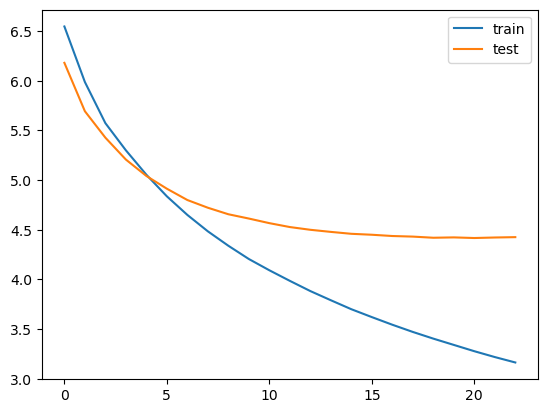

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [36]:
# 23회 진행 후 early stopping 발동

In [37]:
#인퍼런스 모델 구현
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [38]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_output3, state_h3, state_c3])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [39]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

In [40]:
# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

In [41]:
# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [42]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [43]:
#모델 테스트
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0 and i!='sostoken' and i!='eostoken'):
            temp = temp + src_index_to_word[i]+' '
    return temp

In [44]:
for i in range(8455, 8460):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : net worth world richest person amazon founder jeff bezos crossed billion monday billion net worth world second richest person bill gates bezos pegged richest person modern history richer anyone else since least forbes published inaugural wealth ranking 
실제 요약 : authority us bronze super notes per teacher gandhi 
1/1 [==============================] - 0s 26ms/step
예측 요약 :  jeff bezos loses billion wealth jeff bezos


원문 : several activists maharashtra protesting stop forest department hunting man eating tigress named avni reportedly responsible deaths last years online petition save tigress two cubs also received signatures meanwhile ground personnel elephants shooters deployed till date find avni 
실제 요약 : said female action hand us closed delays recycled 
1/1 [==============================] - 0s 26ms/step
예측 요약 :  people killed maharashtra


원문 : actor diljit dosanjh took twitter reveal bought private jet shared pictures twitter caption new beginning starts private jet actor also

In [45]:
#추출적 요약

In [46]:
import requests
from summa.summarizer import summarize